# WEEK11 Car Listings Data Analysis: Cleaning, Exploration, and Visualization <hr style="border:2.5px solid #FFC0CB"></hr>

Name:**Wendy Sai D. Infante** <br>
Course:**CPE2A**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Load dataset

In [137]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\CAR_DETAILS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           3906 non-null   object
 5   seller_type    3906 non-null   object
 6   transmission   3906 non-null   object
 7   owner          3906 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Display initial data overview

In [138]:
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel             434
seller_type      434
transmission     434
owner            434
dtype: int64


In [139]:
num_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [140]:
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0]) 

In [141]:
print("\nDuplicates before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after removal:", df.duplicated().sum())


Duplicates before removal: 642
Duplicates after removal: 0


In [142]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [143]:
df['year'] = df['year'].astype(int)

In [144]:
df.describe()

,year,selling_price,km_driven
count,3698.000000,3.698000e+03,3698.000000
mean,2012.967280,4.784706e+05,68661.271769
std,4.252035,5.234857e+05,47239.887860
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,35002.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [145]:
df.to_csv("C:/Users/ASUS/Documents/CAR_DETAILS_CLEANED.csv", index=False)


In [146]:

print("\nData Cleaning Completed. Cleaned file saved.")


Data Cleaning Completed. Cleaned file saved.


## Data Visualization of Cleaned DataSet

In [147]:
df = pd.read_csv(r"..\raw\cleaned_car_details.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2412 non-null   object
 1   year           2412 non-null   int64 
 2   selling_price  2412 non-null   int64 
 3   km_driven      2412 non-null   int64 
 4   fuel           2412 non-null   object
 5   seller_type    2412 non-null   object
 6   transmission   2412 non-null   object
 7   owner          2412 non-null   object
dtypes: int64(3), object(5)
memory usage: 150.9+ KB


In [148]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
1,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
2,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
3,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
4,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


## Brand Cars (Automatic And Manual)

In [149]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])

In [150]:
brand_counts = df['brand'].value_counts()
brand_counts

brand
Maruti           732
Hyundai          443
Mahindra         226
Tata             204
Honda            146
Ford             137
Chevrolet        103
Toyota           100
Renault           86
Volkswagen        59
Nissan            38
Skoda             35
Datsun            23
Audi              20
Fiat              18
BMW               14
Mercedes-Benz      9
Mitsubishi         4
Jaguar             4
Jeep               2
Volvo              2
Ambassador         2
Daewoo             1
Force              1
MG                 1
Kia                1
Land               1
Name: count, dtype: int64

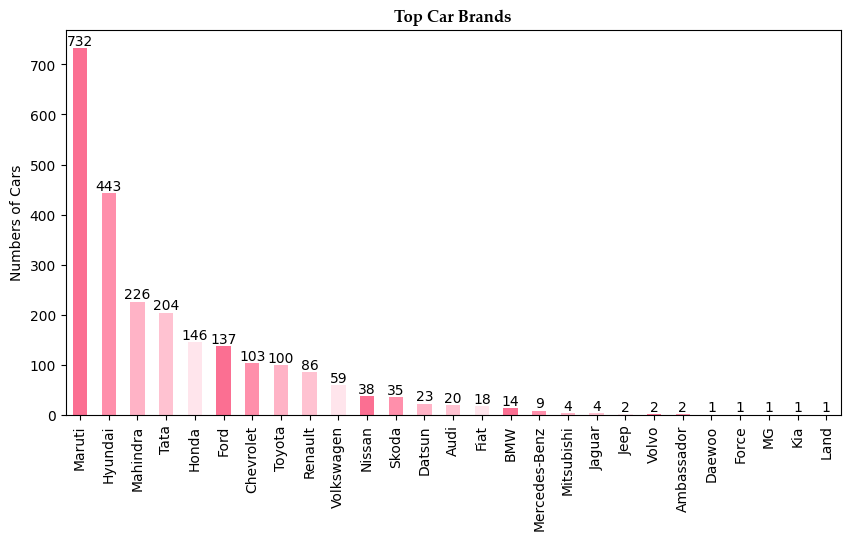

In [151]:
chart = brand_counts.plot(kind='bar',color = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top Car Brands', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(brand_counts.index, rotation=90)
plt.ylabel('Numbers of Cars')
plt.show()

## Top Manual Car Brands

In [152]:
manual_cars = df[df["transmission"] == "Manual"]
manual_cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
1,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
2,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
3,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata
4,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,Maruti
...,...,...,...,...,...,...,...,...,...
2407,Tata Indica Vista Aqua 1.4 TDI,2010,150000,130000,Diesel,Individual,Manual,Second Owner,Tata
2408,Ford EcoSport 1.5 TDCi Titanium BSIV,2015,530000,175000,Diesel,Individual,Manual,Third Owner,Ford
2409,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner,Maruti
2410,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai


In [153]:
top_manual_brands = manual_cars["brand"].value_counts().head(10)
print("Top 10 Manual Car Brands:\n", top_manual_brands)

Top 10 Manual Car Brands:
 brand
Maruti        704
Hyundai       406
Mahindra      213
Tata          200
Ford          132
Honda         131
Chevrolet     100
Toyota         91
Renault        82
Volkswagen     50
Name: count, dtype: int64


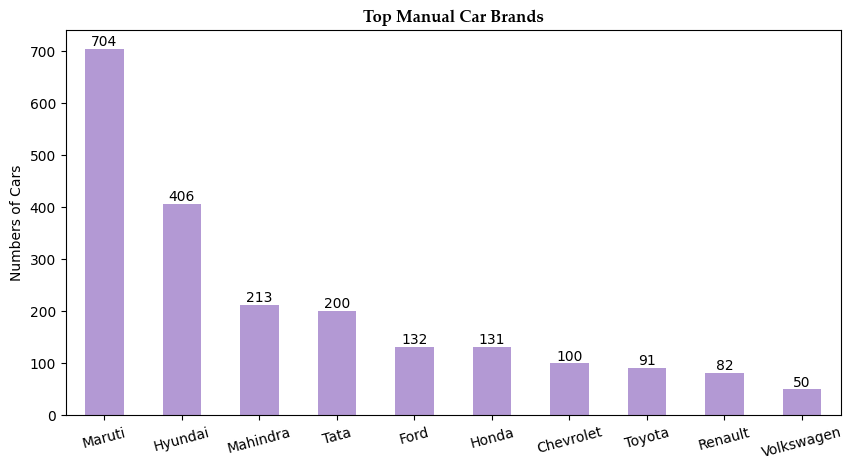

In [154]:
chart = top_manual_brands.plot(kind='bar',color = ['#B399D4'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top Manual Car Brands', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(top_manual_brands.index, rotation=15)
plt.ylabel('Numbers of Cars')
plt.show()

## Top Automatic Car Brands

In [155]:
automatic_cars = df[df["transmission"] == "Automatic"]
automatic_cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
5,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner,Toyota
10,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner,Jaguar
11,Maruti Vitara Brezza ZDi Plus AMT,2018,975000,4500,Diesel,Dealer,Automatic,First Owner,Maruti
12,Audi Q5 2.0 TDI,2011,1190000,175900,Diesel,Dealer,Automatic,First Owner,Audi
14,Audi A6 2.0 TDI Design Edition,2013,1735000,50000,Diesel,Dealer,Automatic,First Owner,Audi
...,...,...,...,...,...,...,...,...,...
2343,Honda Accord 2.4 AT,2009,428000,40000,Petrol,Individual,Automatic,Third Owner,Honda
2366,Toyota Fortuner 2.7 2WD AT,2016,2500000,70000,Petrol,Individual,Automatic,Second Owner,Toyota
2370,Hyundai Santro Xing XG AT,2004,125000,70000,Petrol,Individual,Automatic,Second Owner,Hyundai
2380,Hyundai Verna CRDi 1.6 AT EX,2018,1100000,25000,Diesel,Individual,Automatic,Second Owner,Hyundai


In [156]:
top_automatic_brands = automatic_cars["brand"].value_counts().head(10)
print("\nTop 10 Automatic Car Brands:\n", top_automatic_brands)


Top 10 Automatic Car Brands:
 brand
Hyundai          37
Maruti           28
Audi             20
Skoda            15
Honda            15
BMW              14
Mahindra         13
Toyota            9
Volkswagen        9
Mercedes-Benz     8
Name: count, dtype: int64


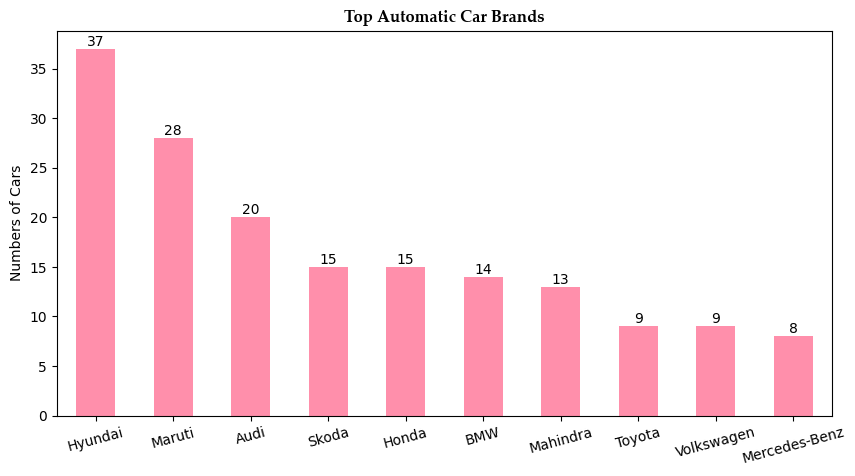

In [157]:
chart = top_automatic_brands.plot(kind='bar',color = ['#FF8FAB'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top Automatic Car Brands', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(top_automatic_brands.index, rotation=15)
plt.ylabel('Numbers of Cars')
plt.show()

## Manual Car Trends

### Manual Cars Selling Price Trend

In [158]:
df_m = df[['transmission','year','selling_price']].where(df['transmission']=='Manual').dropna()
df_m

,transmission,year,selling_price
0,Manual,2007.0,135000.0
1,Manual,2017.0,250000.0
2,Manual,2014.0,450000.0
3,Manual,2014.0,240000.0
4,Manual,2017.0,365000.0
...,...,...,...
2407,Manual,2010.0,150000.0
2408,Manual,2015.0,530000.0
2409,Manual,2012.0,225000.0
2410,Manual,2014.0,409999.0


In [159]:
df_m = df_m.groupby('year')['selling_price'].mean().reset_index()
df_m

,year,selling_price
0,1992.0,50000.000000
1,1995.0,95000.000000
2,1996.0,225000.000000
3,1997.0,100000.000000
4,1998.0,67333.333333
5,1999.0,65000.000000
6,2000.0,94166.666667
7,2001.0,140333.222222
8,2002.0,90000.000000
9,2003.0,94142.857143


Text(0, 0.5, 'Selling Price')

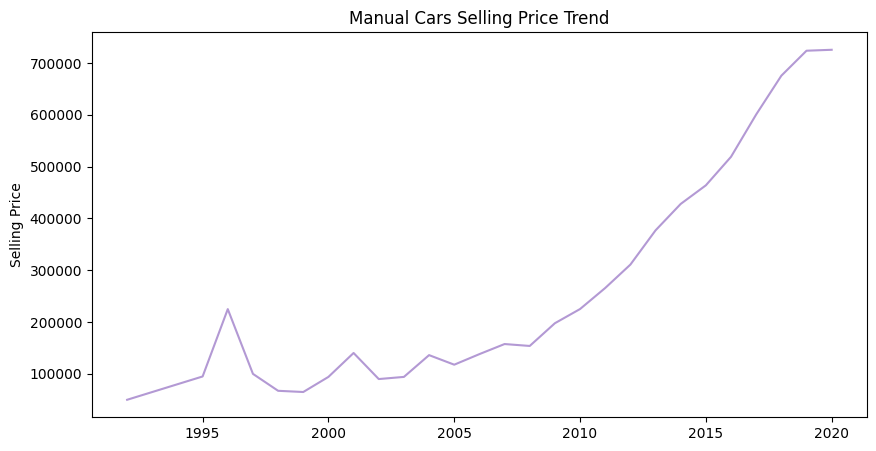

In [160]:
plt.figure(figsize=(10,5))
plt.plot(df_m['year'],df_m['selling_price'], color='#B399D4')
plt.title('Manual Cars Selling Price Trend')
plt.ylabel('Selling Price')

### Average Manual Cars Mileage Trend

In [161]:
df_m = df[['transmission', 'year', 'km_driven']].where(df['transmission'] == 'Manual').dropna()
df_m

,transmission,year,km_driven
0,Manual,2007.0,50000.0
1,Manual,2017.0,46000.0
2,Manual,2014.0,141000.0
3,Manual,2014.0,60000.0
4,Manual,2017.0,78000.0
...,...,...,...
2407,Manual,2010.0,130000.0
2408,Manual,2015.0,175000.0
2409,Manual,2012.0,90000.0
2410,Manual,2014.0,80000.0


In [162]:
df_m = df_m.groupby('year')['km_driven'].mean().reset_index()
df_m

,year,km_driven
0,1992.0,100000.000000
1,1995.0,100000.000000
2,1996.0,47500.000000
3,1997.0,100000.000000
4,1998.0,80833.333333
5,1999.0,73000.000000
6,2000.0,75000.000000
7,2001.0,79262.111111
8,2002.0,82769.230769
9,2003.0,81888.642857


Text(0, 0.5, 'Average Mileage (km driven)')

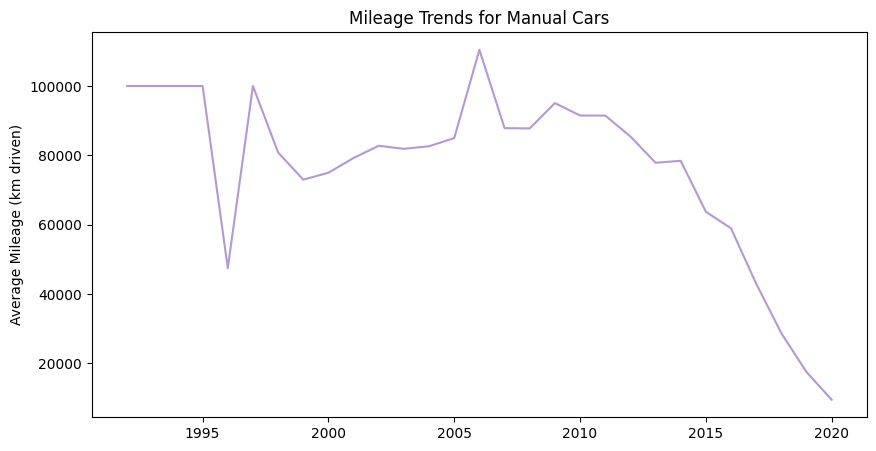

In [163]:
plt.figure(figsize=(10,5))
plt.plot(df_m['year'],df_m['km_driven'], color='#B399D4')
plt.title('Mileage Trends for Manual Cars')
plt.ylabel('Average Mileage (km driven)')

### Average Selling Price by Fuel Type (Manual Cars)

In [164]:
df_m = df[['transmission', 'fuel', 'selling_price']].where(df['transmission'] == 'Manual').dropna()
df_m

,transmission,fuel,selling_price
0,Manual,Petrol,135000.0
1,Manual,Petrol,250000.0
2,Manual,Diesel,450000.0
3,Manual,Petrol,240000.0
4,Manual,CNG,365000.0
...,...,...,...
2407,Manual,Diesel,150000.0
2408,Manual,Diesel,530000.0
2409,Manual,Diesel,225000.0
2410,Manual,Diesel,409999.0


In [165]:
df_m = df_m.groupby('fuel')['selling_price'].mean().reset_index()
df_m

,fuel,selling_price
0,CNG,293422.961538
1,Diesel,495610.069495
2,LPG,157500.000000
3,Petrol,298431.829428


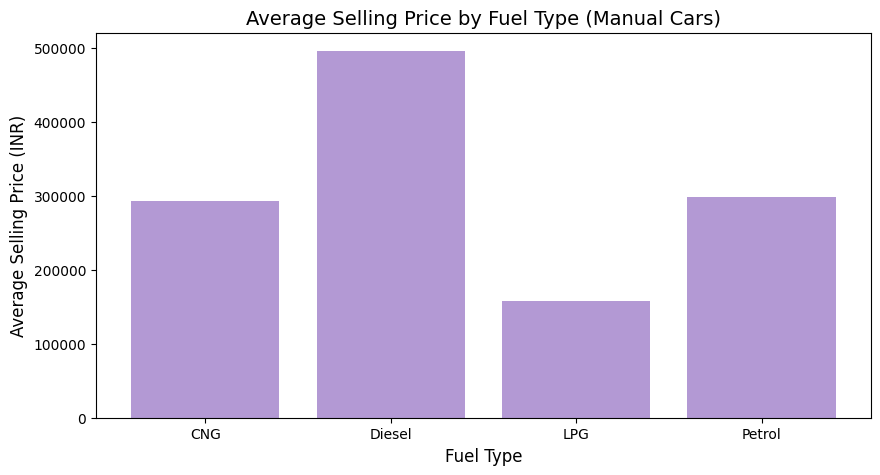

In [166]:
plt.figure(figsize=(10, 5))
plt.bar(df_m['fuel'], df_m['selling_price'], color='#B399D4')
plt.title('Average Selling Price by Fuel Type (Manual Cars)', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Selling Price (INR)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

### Demand for Manual cars Over the Years

In [167]:
df_m = df[df['transmission'] == 'Manual'].groupby('year').size().reset_index(name='count')
df_m

,year,count
0,1992,1
1,1995,1
2,1996,2
3,1997,2
4,1998,6
5,1999,5
6,2000,6
7,2001,9
8,2002,13
9,2003,14


Text(0, 0.5, 'Number of Listings')

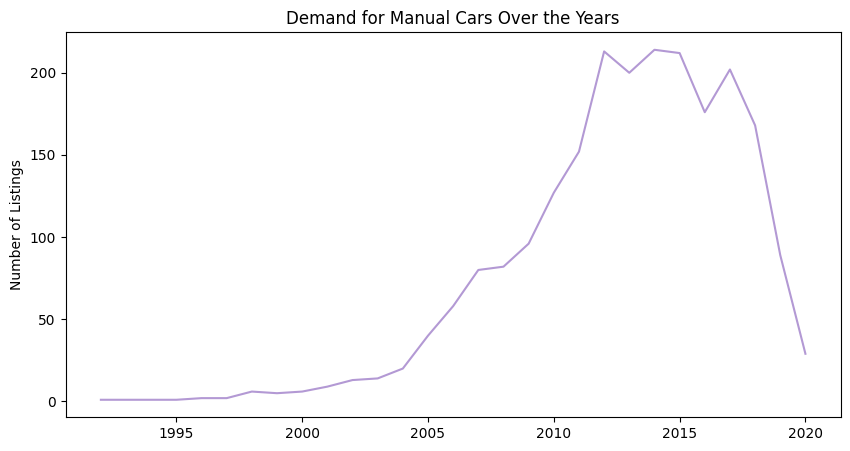

In [168]:
plt.figure(figsize=(10,5))
plt.plot(df_m['year'],df_m['count'], color='#B399D4')
plt.title('Demand for Manual Cars Over the Years')
plt.ylabel('Number of Listings')

### Number of Listings by Fuel Type (Manual Cars)

In [169]:
df_m = df[df['transmission'] == 'Manual']['fuel'].value_counts()

In [170]:
df_m = df[df['transmission'] == 'Manual'].groupby('fuel').size().reset_index(name='count')
df_m = df_m.sort_values(by='count', ascending=False)
df_m

,fuel,count
1,Diesel,1108
3,Petrol,1067
0,CNG,26
2,LPG,16


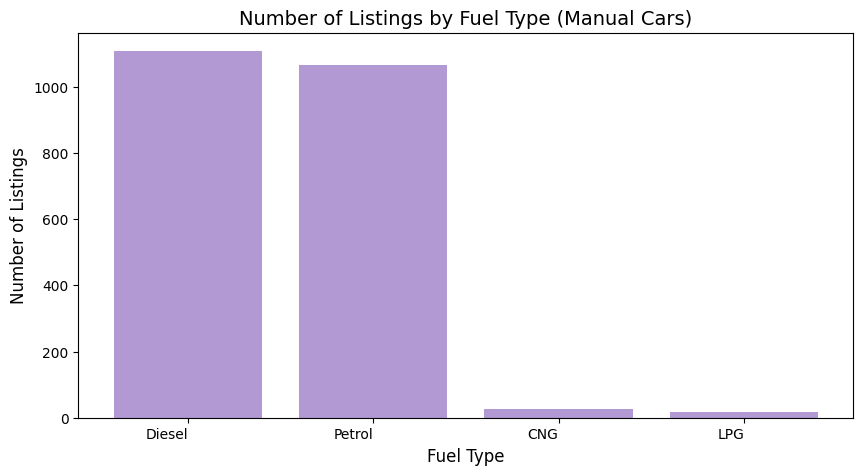

In [171]:
plt.figure(figsize=(10, 5))
plt.bar(df_m["fuel"], df_m["count"], color='#B399D4')
plt.title('Number of Listings by Fuel Type (Manual Cars)', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.show()

### Number of Listings by Owner Type (Manual Cars)

In [172]:
df_m= df[df['transmission'] == 'Manual']['owner'].value_counts()

In [173]:
df_m = df[df['transmission'] == 'Manual'].groupby('owner').size().reset_index(name='count')
df_m = df_m.sort_values(by='count', ascending=False)
df_m 

,owner,count
0,First Owner,1374
2,Second Owner,613
4,Third Owner,170
1,Fourth & Above Owner,49
3,Test Drive Car,11


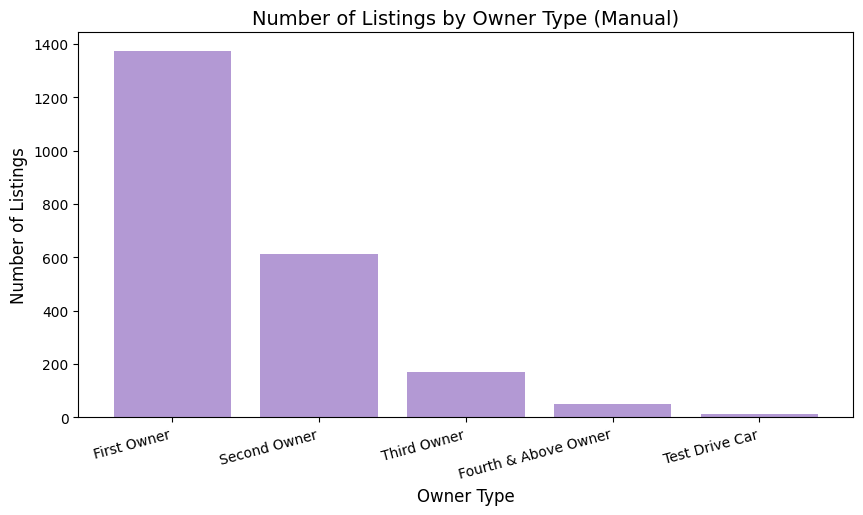

In [174]:
plt.figure(figsize=(10, 5))
plt.bar(df_m["owner"], df_m["count"], color='#B399D4')
plt.title('Number of Listings by Owner Type (Manual)', fontsize=14)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.show()

## Automatic Car Trends

### Automatic Cars Selling Price Trend

In [175]:
df_a= df[['transmission','year','selling_price']].where(df['transmission']=='Automatic').dropna()
df_a

,transmission,year,selling_price
5,Automatic,2018.0,1650000.0
10,Automatic,2014.0,1964999.0
11,Automatic,2018.0,975000.0
12,Automatic,2011.0,1190000.0
14,Automatic,2013.0,1735000.0
...,...,...,...
2343,Automatic,2009.0,428000.0
2366,Automatic,2016.0,2500000.0
2370,Automatic,2004.0,125000.0
2380,Automatic,2018.0,1100000.0


In [176]:
df_a = df_a.groupby('year')['selling_price'].mean().reset_index()
df_a

,year,selling_price
0,1998.0,1.000000e+06
1,2004.0,1.250000e+05
2,2006.0,3.181250e+05
3,2007.0,3.250000e+05
4,2008.0,5.766667e+05
5,2009.0,7.696667e+05
6,2010.0,4.540000e+05
7,2011.0,6.617500e+05
8,2012.0,1.044190e+06
9,2013.0,1.231562e+06


Text(0, 0.5, 'Selling Price')

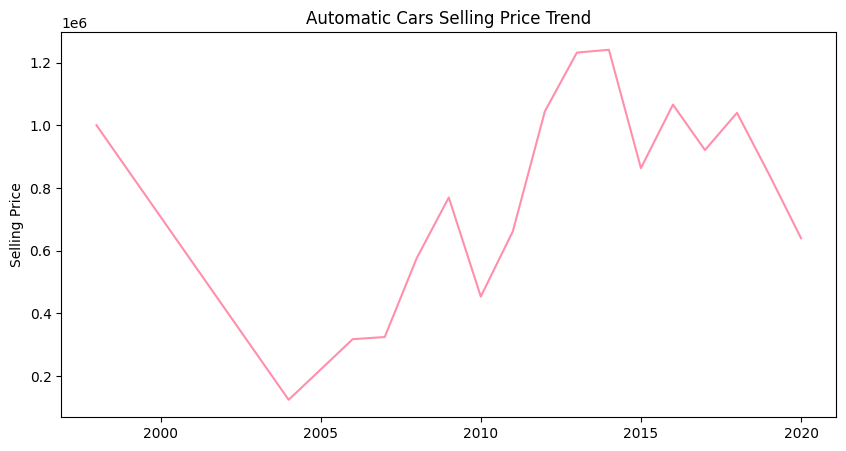

In [177]:
plt.figure(figsize=(10,5))
plt.plot(df_a['year'],df_a['selling_price'], color='#FF8FAB')
plt.title('Automatic Cars Selling Price Trend')
plt.ylabel('Selling Price')

### Average Automatic Cars Mileage Trend

In [178]:
df_a = df[['transmission', 'year', 'km_driven']].where(df['transmission'] == 'Automatic').dropna()
df_a

,transmission,year,km_driven
5,Automatic,2018.0,25000.0
10,Automatic,2014.0,28000.0
11,Automatic,2018.0,4500.0
12,Automatic,2011.0,175900.0
14,Automatic,2013.0,50000.0
...,...,...,...
2343,Automatic,2009.0,40000.0
2366,Automatic,2016.0,70000.0
2370,Automatic,2004.0,70000.0
2380,Automatic,2018.0,25000.0


In [179]:
df_a = df_a.groupby('year')['km_driven'].mean().reset_index()
df_a

,year,km_driven
0,1998.0,35000.000000
1,2004.0,70000.000000
2,2006.0,78250.000000
3,2007.0,78500.000000
4,2008.0,86200.000000
5,2009.0,83333.333333
6,2010.0,107724.000000
7,2011.0,104395.333333
8,2012.0,81045.476190
9,2013.0,56311.875000


Text(0, 0.5, 'Average Mileage (km driven)')

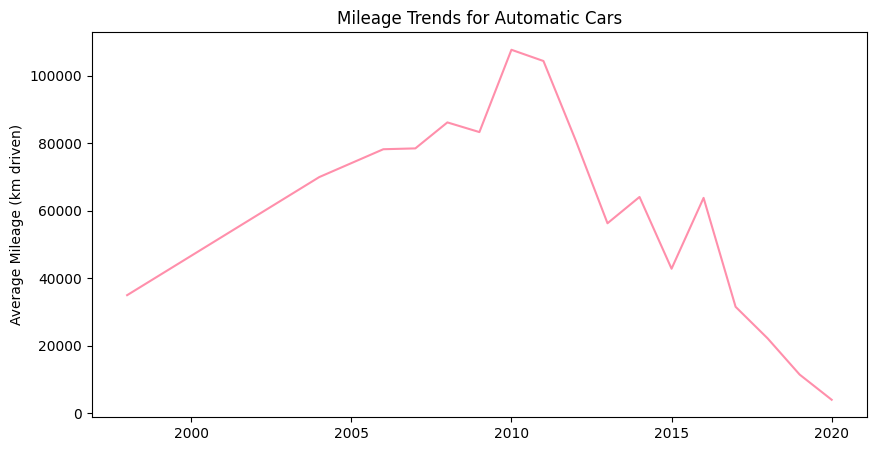

In [180]:
plt.figure(figsize=(10,5))
plt.plot(df_a['year'],df_a['km_driven'], color='#FF8FAB')
plt.title('Mileage Trends for Automatic Cars')
plt.ylabel('Average Mileage (km driven)')

### Average Selling Price by Fuel Type (Automatic Cars)

In [181]:
df_a = df[['transmission', 'fuel', 'selling_price']].where(df['transmission'] == 'Automatic').dropna()
df_a

,transmission,fuel,selling_price
5,Automatic,Petrol,1650000.0
10,Automatic,Diesel,1964999.0
11,Automatic,Diesel,975000.0
12,Automatic,Diesel,1190000.0
14,Automatic,Diesel,1735000.0
...,...,...,...
2343,Automatic,Petrol,428000.0
2366,Automatic,Petrol,2500000.0
2370,Automatic,Petrol,125000.0
2380,Automatic,Diesel,1100000.0


In [182]:
df_a = df_a.groupby('fuel')['selling_price'].mean().reset_index()
df_a

,fuel,selling_price
0,Diesel,1.218899e+06
1,Petrol,6.322396e+05


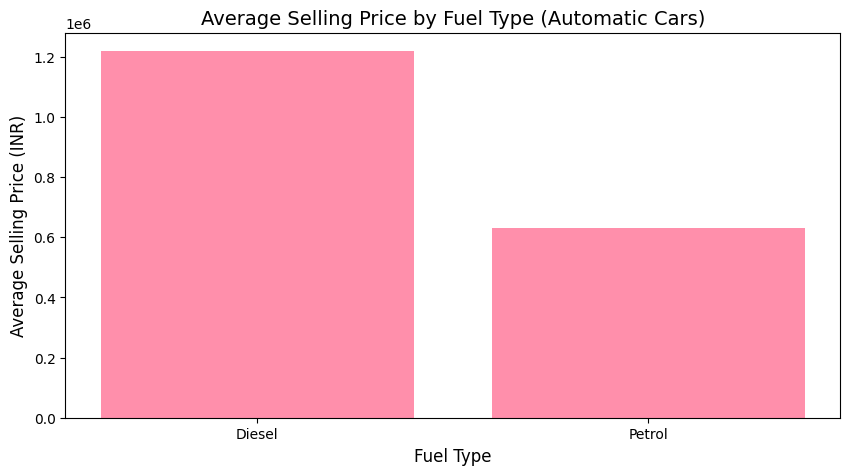

In [183]:
plt.figure(figsize=(10, 5))
plt.bar(df_a['fuel'], df_a['selling_price'], color='#FF8FAB')
plt.title('Average Selling Price by Fuel Type (Automatic Cars)', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Selling Price (INR)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

### Demand for Automatic Cars Over the Years

In [184]:
df_a = df[df['transmission'] == 'Automatic'].groupby('year').size().reset_index(name='count')
df_a

,year,count
0,1998,1
1,2004,1
2,2006,8
3,2007,2
4,2008,3
5,2009,6
6,2010,5
7,2011,12
8,2012,21
9,2013,16


Text(0, 0.5, 'Number of Listings')

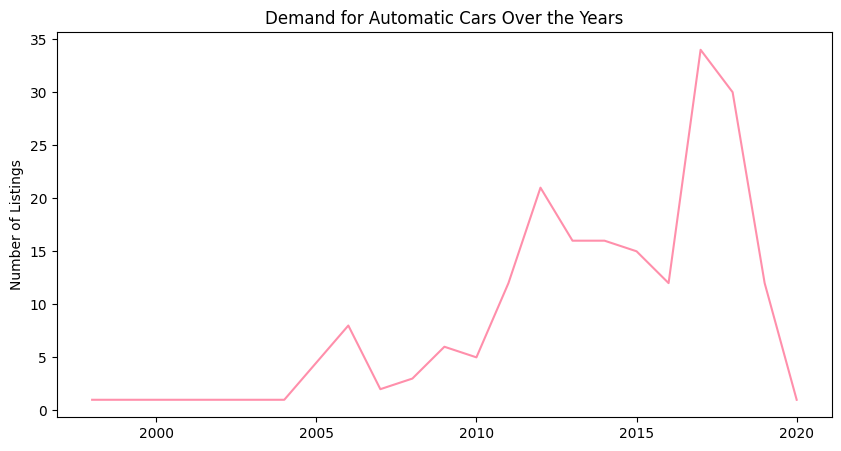

In [185]:
plt.figure(figsize=(10,5))
plt.plot(df_a['year'],df_a['count'], color='#FF8FAB')
plt.title('Demand for Automatic Cars Over the Years')
plt.ylabel('Number of Listings')

### Number of Listings by Fuel Type (Automatic Cars)

In [186]:
df_a = df[df['transmission'] == 'Automatic']['fuel'].value_counts()

In [187]:
df_a = df[df['transmission'] == 'Automatic'].groupby('fuel').size().reset_index(name='count')
df_a

,fuel,count
0,Diesel,99
1,Petrol,96


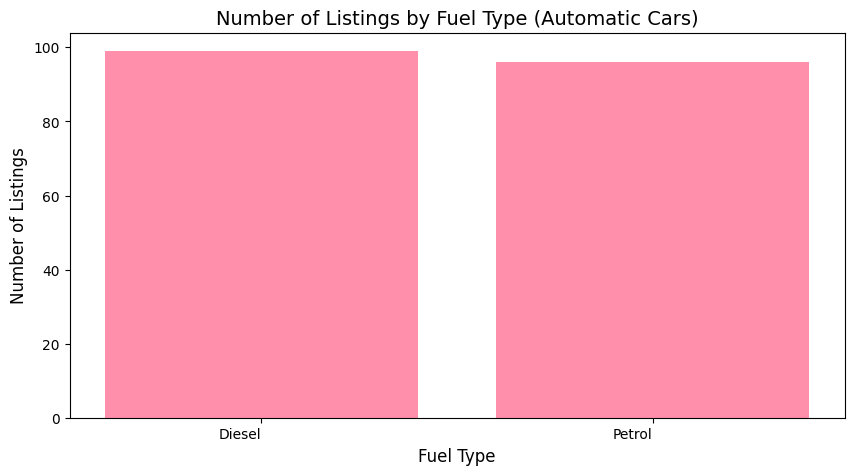

In [188]:
plt.figure(figsize=(10, 5))
plt.bar(df_a["fuel"], df_a["count"], color='#FF8FAB')
plt.title('Number of Listings by Fuel Type (Automatic Cars)', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.show()

### Number of Listings by Owner Type (Automatic Cars)

In [189]:
df_a = df[df['transmission'] == 'Automatic']['owner'].value_counts()

In [190]:
df_a = df[df['transmission'] == 'Automatic'].groupby('owner').size().reset_index(name='count')
df_a = df_a.sort_values(by='count', ascending=False)
df_a 

,owner,count
0,First Owner,130
2,Second Owner,48
4,Third Owner,14
1,Fourth & Above Owner,2
3,Test Drive Car,1


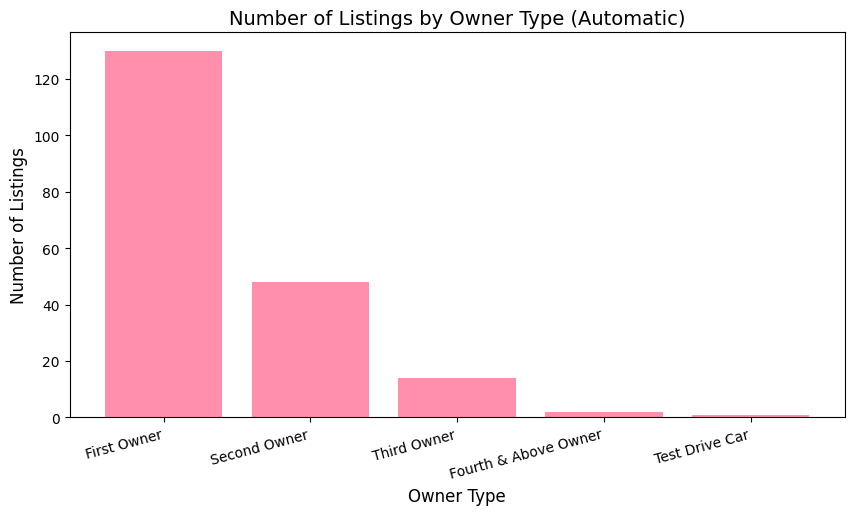

In [191]:
plt.figure(figsize=(10, 5))
plt.bar(df_a["owner"], df_a["count"], color='#FF8FAB')
plt.title('Number of Listings by Owner Type (Automatic)', fontsize=14)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.show()

## Summary 

### Selling Price Trend (Manual vs Automatic Cars)

In [192]:
df_m = pd.DataFrame({
    "year": [1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selling_price": [50000, 95000, 225000, 100000, 67333, 65000, 94166, 140333, 90000, 94142, 136199, 117727, 138120, 157587, 153892, 197760, 225154, 265769, 310910, 377003, 428032, 463938, 519022, 600727, 675553, 723775, 725586]
})
df_a = pd.DataFrame({
    "year": [1998, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selling_price": [1e6, 125000, 318125, 325000, 576667, 769667, 454000, 661750, 1044190, 1231562, 1240562, 863400, 1065750, 920852, 1039700, 843749, 640000]
})

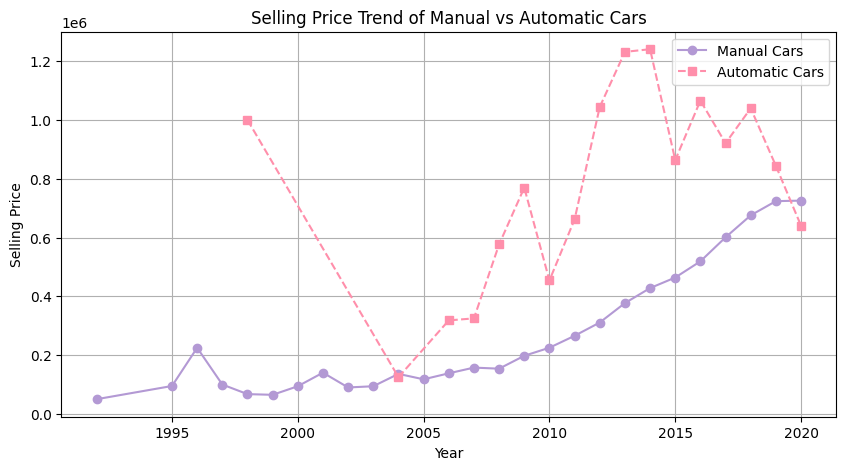

In [193]:
plt.figure(figsize=(10, 5))
plt.plot(df_m["year"], df_m["selling_price"], marker='o', linestyle='-', color='#B399D4', label="Manual Cars")
plt.plot(df_a["year"], df_a["selling_price"], marker='s', linestyle='--', color='#FF8FAB', label="Automatic Cars")
plt.title("Selling Price Trend of Manual vs Automatic Cars")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.legend()
plt.grid(True)
plt.show()

### Average Cars Mileage Trend (Manual vs Automatic Cars)

In [194]:
df_m = pd.DataFrame({
    "year": [1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "km_driven": [100000, 100000, 47500, 100000, 80833.33, 73000, 75000, 79262.11, 82769.23, 81888.64, 82635.15,
                  84990.42, 110455.66, 87845.21, 87779.84, 95080.49, 91497.64, 91484.26, 85468.21, 77869.97,
                  78436.42, 63751.17, 58950.90, 43001.18, 28713.27, 17524.22, 9522.86]
})
df_a = pd.DataFrame({
    "year": [1998, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "km_driven": [35000, 70000, 78250, 78500, 86200, 83333.33, 107724, 104395.33, 81045.48, 56311.88,
                  64109.25, 42834.07, 63831.67, 31553.47, 22193.47, 11467.25, 4000]
})

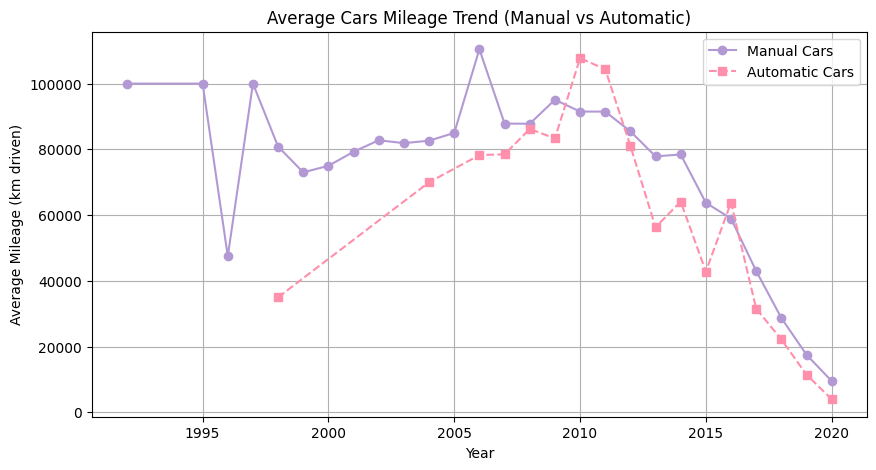

In [195]:
plt.figure(figsize=(10, 5))
plt.plot(df_m["year"], df_m["km_driven"], marker='o', linestyle='-', color='#B399D4', label="Manual Cars")
plt.plot(df_a["year"], df_a["km_driven"], marker='s', linestyle='--', color='#FF8FAB', label="Automatic Cars")
plt.title("Average Cars Mileage Trend (Manual vs Automatic)")
plt.xlabel("Year")
plt.ylabel("Average Mileage (km driven)")
plt.legend()
plt.grid(True)
plt.show()

### Average Selling Price by Fuel Type (Manual vs Automatic Cars)

In [196]:
fuel_types_m = ['CNG', 'Diesel', 'LPG', 'Petrol']
selling_price_m = [293422.96, 495610.07, 157500.00, 298431.83]
fuel_types_a = ['Diesel', 'Petrol']
selling_price_a = [1218899.00, 632239.60]

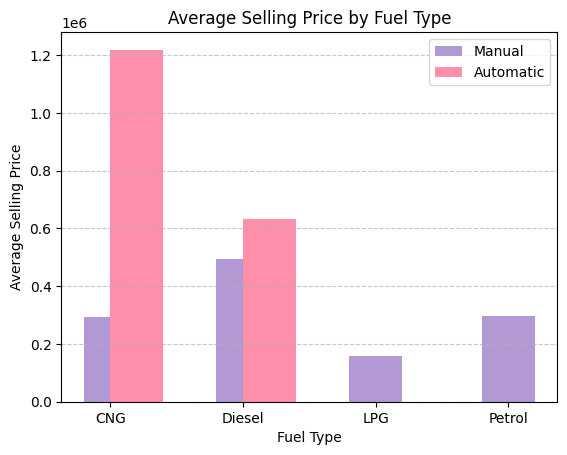

In [197]:
bar_width = 0.4
x_m = np.arange(len(fuel_types_m)) 
x_a = np.arange(len(fuel_types_a)) + 0.2 
plt.bar(x_m, selling_price_m, width=bar_width, color='#B399D4', label='Manual')
plt.bar(x_a, selling_price_a, width=bar_width, color='#FF8FAB', label='Automatic')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Fuel Type')
plt.xticks(ticks=np.arange(len(fuel_types_m)), labels=fuel_types_m) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Demand for Cars Over the Years (Manual vs Automatic Cars)

In [198]:
years_m = [1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 
           2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 
           2016, 2017, 2018, 2019, 2020]
counts_m = [1, 1, 2, 2, 6, 5, 6, 9, 13, 14, 20, 40, 58, 80, 82, 96, 127, 
            152, 213, 200, 214, 212, 176, 202, 168, 89, 29]
years_a = [1998, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 
           2015, 2016, 2017, 2018, 2019, 2020]
counts_a = [1, 1, 8, 2, 3, 6, 5, 12, 21, 16, 16, 15, 12, 34, 30, 12, 1]

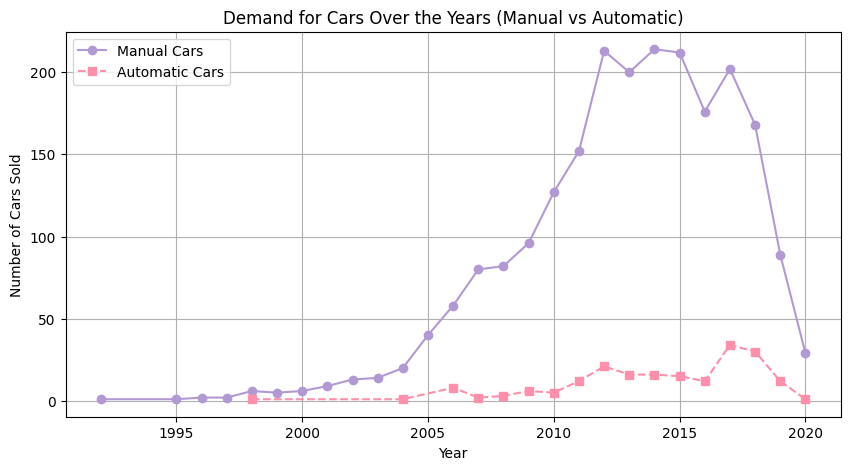

In [199]:
plt.figure(figsize=(10, 5))
plt.plot(years_m, counts_m, marker='o', linestyle='-', color='#B399D4', label="Manual Cars")
plt.plot(years_a, counts_a, marker='s', linestyle='--', color='#FF8FAB', label="Automatic Cars")
plt.title("Demand for Cars Over the Years (Manual vs Automatic)")
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.legend()
plt.grid(True)
plt.show()

### Number of Listings by Fuel Type (Manual vs Automatic Cars)

In [200]:
df_m = pd.DataFrame({'fuel': ['Diesel', 'Petrol', 'CNG', 'LPG'], 'count': [1108, 1067, 26, 16]})
df_a = pd.DataFrame({'fuel': ['Diesel', 'Petrol'], 'count': [99, 96]})

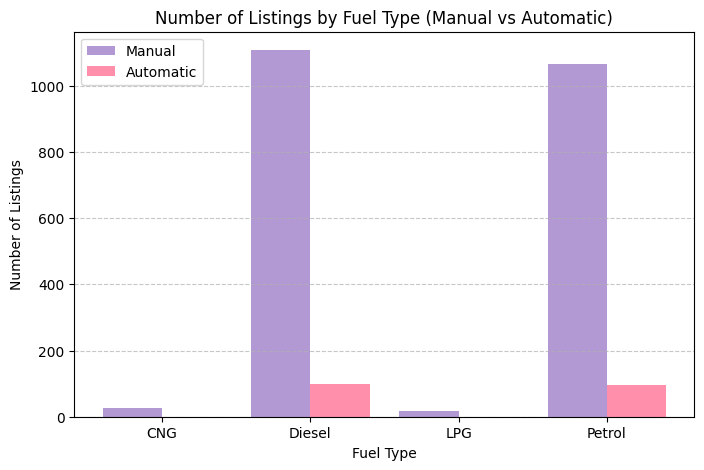

In [201]:
df = pd.merge(df_m, df_a, on="fuel", how="outer", suffixes=('_manual', '_automatic')).fillna(0)
fuel_types = df['fuel']
manual_counts = df['count_manual']
automatic_counts = df['count_automatic']
bar_width = 0.4
x = np.arange(len(fuel_types))
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, manual_counts, width=bar_width, color='#B399D4', label='Manual')
plt.bar(x + bar_width/2, automatic_counts, width=bar_width, color='#FF8FAB', label='Automatic')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Fuel Type (Manual vs Automatic)')
plt.xticks(ticks=x, labels=fuel_types)  
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Number of Listings by Owner Type (Manual vs Automatic Cars)

In [202]:
df_m = pd.DataFrame({'owner': ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],'count': [1374, 613, 170, 49, 11]})
df_a = pd.DataFrame({'owner': ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],'count': [130, 48, 14, 2, 1]})

In [ ]:
df = pd.merge(df_m, df_a, on="owner", how="outer", suffixes=('_manual', '_automatic')).fillna(0)
owner_types = df['owner']
manual_counts = df['count_manual']
automatic_counts = df['count_automatic']
bar_width = 0.4
x = np.arange(len(owner_types))
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, manual_counts, width=bar_width, color='#B399D4', label='Manual')
plt.bar(x + bar_width/2, automatic_counts, width=bar_width, color='#FF8FAB', label='Automatic')
plt.xlabel('Owner Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Owner Type (Manual vs Automatic)')
plt.xticks(ticks=x, labels=owner_types, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()